##### installing requirements 

In [1]:
%pip install numpy
%pip install nltk
%pip install pandas 
%pip install scikit-learn
%pip install stopwords
%pip install matplotlib
%pip install tabulate

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


##### importing libraries 

In [2]:
#Pandas: Facilitates efficient data manipulation and analysis tasks.
import pandas as pd 

#NumPy: Foundation for numerical computing and scientific operations.
import numpy as np
#Sklearn : sklearn is a Python module integrating classical machine learning algorithms in the tightly-knit world of scientific Python packages (numpy, scipy, matplotlib).
import sklearn
#nltk : The Natural Language Toolkit (NLTK) is an open source Python library for Natural Language Processing. A free online book is available. (If you use the library for academic research, please cite the book.)
import nltk 
from nltk.corpus import stopwords

##### importing differents data parts and merging them 

In [3]:
#importing three dataset. The dataset is divied into three seperate files 
goEmotionsDataSet1=pd.read_csv("dataSets/goemotions_1.csv")
goEmotionsDataSet2=pd.read_csv("dataSets/goemotions_2.csv")
goEmotionsDataSet3=pd.read_csv("dataSets/goemotions_3.csv")

In [4]:
#since the dataset is divided into three seperate varaiables  we will join it into one single data variables using the pd.concat function 
data=pd.concat([goEmotionsDataSet1,goEmotionsDataSet2,goEmotionsDataSet3])

##### text preprocessing : stop words removal , tokenization ...

In [5]:
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")

# Get NLTK English stopwords
stopWords = list(stopwords.words("english"))

# Load additional stop words from file
with open("datasets/EN-Stopwords.txt", 'r', encoding='utf-8') as file:
    stopWords.extend([word.strip() for word in file.readlines()])

# Define punctuation marks and contractions
punctuation_marks = ['.', ',', '?', '!', ':', ';', '"', "'", '-', '—', '...', '(', ')', '[', ']', '{', '}', '/', '\\', '&', '*', '%', '$', '#', '@']
contractions = ["ain't", "aren't", "can't", "could've", "couldn't", "didn't", "doesn't", "don't", "gonna", "gotta", "hadn't", "hasn't",
                "haven't", "he'd", "he'll", "he's", "how'd", "how'll", "how's", "I'd", "I'll", "I'm", "I've", "isn't", "it'd", "it'll",
                "it's", "let's", "might've", "must've", "mustn't", "needn't", "oughtn't", "she'd", "she'll", "she's", "should've", "shouldn't",
                "that'd", "that'll", "that's", "there'd", "there'll", "there's", "they'd", "they'll", "they're", "they've", "wasn't", "we'd",
                "we'll", "we're", "we've", "weren't", "what'd", "what'll", "what're", "what's", "what've", "when's", "where'd", "where'll",
                "where's", "who'd", "who'll", "who's", "who've", "why'd", "why'll", "why's", "won't", "would've", "wouldn't", "you'd", "you'll",
                "you're", "you've"]

# Add punctuation marks and contractions to stop words
stopWords.extend(punctuation_marks)
stopWords.extend(contractions)

def removeStopWords(sentenceVector):
    cleanSentence = []
    for word in sentenceVector:
        # Check if word contains alphabetical letters
        if any(char.isalpha() for char in word):
            # Check if word is not in stop words and does not contain apostrophe
            if str(word).lower() not in stopWords and str(word).find("'") == -1:
                cleanSentence.append(word)
    return cleanSentence


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\INFOKOM\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
from  nltk.tokenize import word_tokenize
def tokenizeSentence(sentence):
    return word_tokenize(sentence)

##### dividing data into features and labels 

In [7]:
# we  are going to split our data into two seperate parts labels and features
# the features are all text present in the dataset in a column called "text"
features = data['text'] 
# the labels are the last 28 columns were we have 27 emotion valued as 0 if the emotion is present and 1 if its not and another neutral emotion              
labels = data.drop(columns=['text', 'id', 'author', 'subreddit', 'link_id', 'parent_id',
                            'created_utc', 'rater_id', 'example_very_unclear'])  # Selecting emotion columns as labels


In [8]:
# Total number of tweets
numberOfTweets = len(features)

# Unique emotions
emotions = labels.columns.tolist()

# Total number of unique emotions
numberOfEmotions = len(emotions)

# Frequency of each emotion
emotionsFrequencies = []
for emotion in emotions:
    emotionCount = labels[emotion].sum()  # Count occurrences of 1 (where emotion label is present)
    emotionsFrequencies.append(emotionCount)

# Print the frequency of each emotion
for emotion, frequency in zip(emotions, emotionsFrequencies):
    print(f"{emotion}: {frequency}")

# Print total number of tweets and unique emotions
print("Total number of tweets:", numberOfTweets)
print("Total number of unique emotions:", numberOfEmotions)


admiration: 17131
amusement: 9245
anger: 8084
annoyance: 13618
approval: 17620
caring: 5999
confusion: 7359
curiosity: 9692
desire: 3817
disappointment: 8469
disapproval: 11424
disgust: 5301
embarrassment: 2476
excitement: 5629
fear: 3197
gratitude: 11625
grief: 673
joy: 7983
love: 8191
nervousness: 1810
optimism: 8715
pride: 1302
realization: 8785
relief: 1289
remorse: 2525
sadness: 6758
surprise: 5514
neutral: 55298
Total number of tweets: 211225
Total number of unique emotions: 28


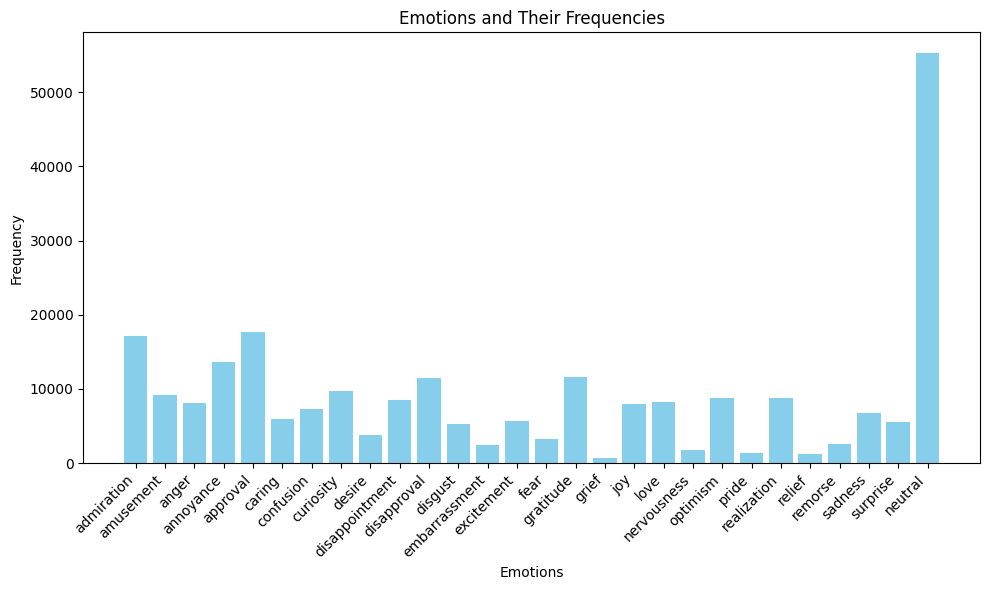

In [9]:
import matplotlib.pyplot as plt

# Plot emotions and their frequencies
plt.figure(figsize=(10, 6))
plt.bar(emotions, emotionsFrequencies, color='skyblue')
plt.title('Emotions and Their Frequencies')
plt.xlabel('Emotions')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


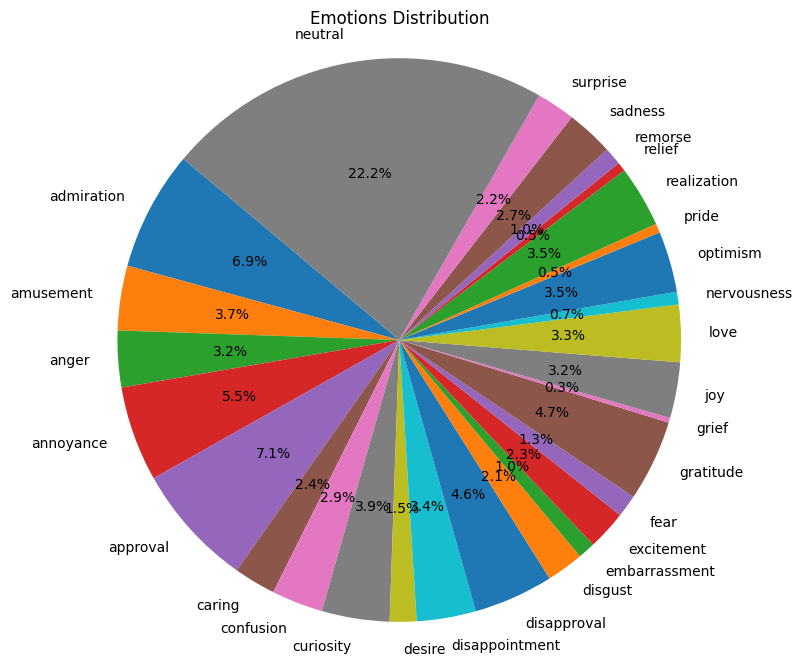

In [10]:
# Plot emotions and their frequencies using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(emotionsFrequencies, labels=emotions, autopct='%1.1f%%', startangle=140)
plt.title('Emotions Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


##### statistics related to words 

In [11]:
#building a dictionnary of all words present in our dataset
distinctWords=[]
allWords=[]
for tweet in features:
    wordsVector=tokenizeSentence(tweet)
    for word in wordsVector:
        allWords.append(word)
        if(word not in distinctWords):
            distinctWords.append(word)

In [ ]:
#we will remove any stop word from the wordsVector
allWords=removeStopWords(allWords)
# Count the frequency of each word
wordsFrequency = {}
for word in allWords:
    wordsFrequency[word] = wordsFrequency.get(word, 0) + 1

# If you want to include only distinct words with their frequencies, you can filter the dictionary
distinctWordsFrequency = {word: freq for word, freq in wordsFrequency.items() if freq > 0}

In [ ]:
sortedDistinctWordsFrequency = dict(sorted(distinctWordsFrequency.items(), key=lambda item: item[1], reverse=True))

In [ ]:
wordFrequencies=list(sortedDistinctWordsFrequency.values())
words=list(sortedDistinctWordsFrequency.keys())

#### Statistics 

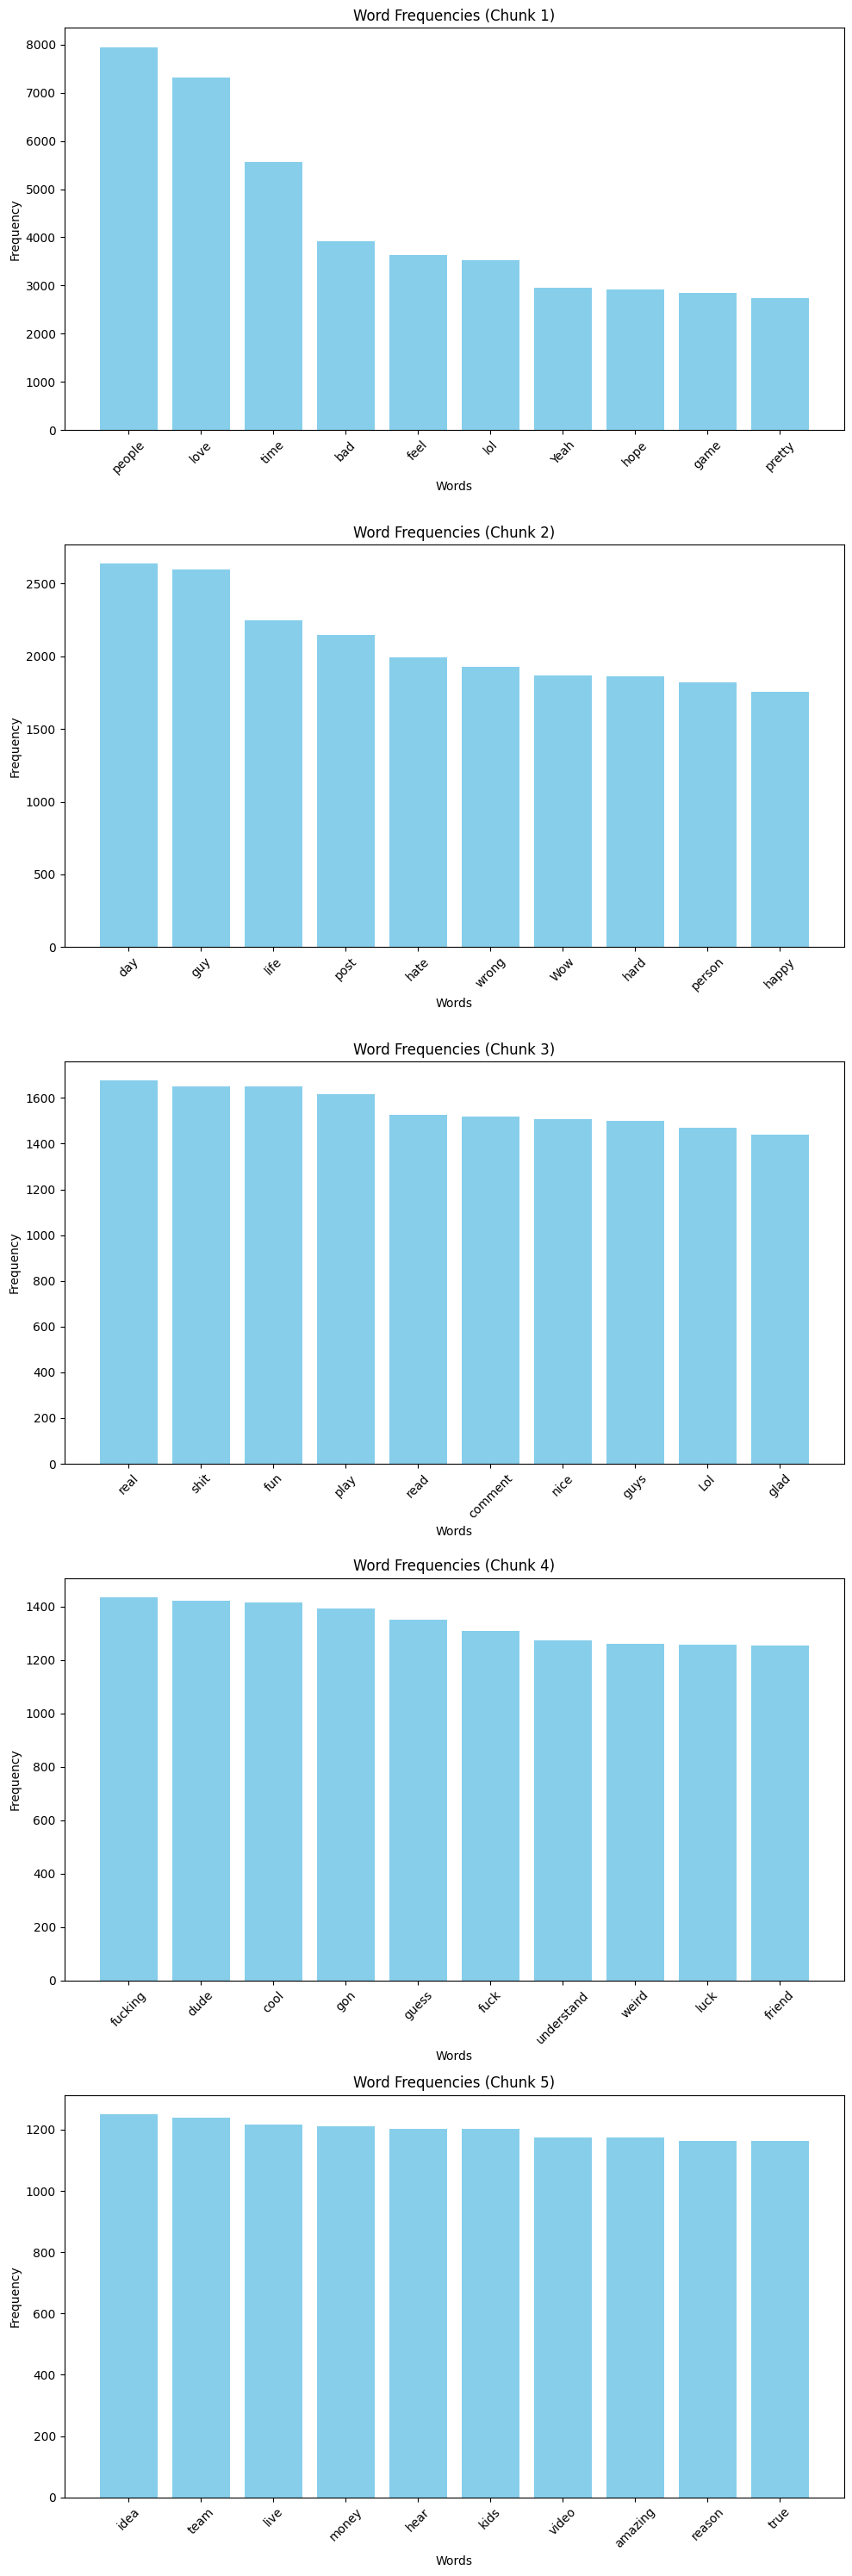

In [ ]:
import matplotlib.pyplot as plt

# Data
words = list(sortedDistinctWordsFrequency.keys())[:50]
frequencies = list(sortedDistinctWordsFrequency.values())[:50]

# Split words and frequencies into chunks of 10
words_chunks = [words[i:i+10] for i in range(0, len(words), 10)]
frequencies_chunks = [frequencies[i:i+10] for i in range(0, len(frequencies), 10)]

# Plot each chunk in a subplot
fig, axs = plt.subplots(len(words_chunks), 1, figsize=(10, 6*len(words_chunks)))

for i, (words_chunk, frequencies_chunk) in enumerate(zip(words_chunks, frequencies_chunks)):
    axs[i].bar(words_chunk, frequencies_chunk, color='skyblue')
    axs[i].set_xlabel('Words')
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'Word Frequencies (Chunk {i+1})')
    axs[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Initialize the DataFrame with your data
data = pd.DataFrame(data)

# Assuming you have defined the list of emotions
emotions = ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral']

# Initialize dictionaries to store the total word count and row count for each emotion
word_count_by_emotion = {emotion: 0 for emotion in emotions}
row_count_by_emotion = {emotion: 0 for emotion in emotions}

# Iterate over each row in the DataFrame
for index, row in data.iterrows():
    # Get the text of the current row
    text = row['text']
    
    # Tokenize the text into words
    words = text.split()  # Split by whitespace; you may need a more sophisticated tokenization method
    
    # Count the number of words in the text
    word_count = len(words)
    
    # Iterate over each emotion and update the word count and row count
    for emotion in emotions:
        if row[emotion] == 1:  # Assuming 1 indicates the presence of the emotion
            word_count_by_emotion[emotion] += word_count
            row_count_by_emotion[emotion] += 1

# Calculate the average word count for each emotion
average_words_by_emotion = {}
for emotion in emotions:
    if row_count_by_emotion[emotion] != 0:
        average_words_by_emotion[emotion] = word_count_by_emotion[emotion] / row_count_by_emotion[emotion]
    else:
        average_words_by_emotion[emotion] = 0

# Print the average word count for each emotion
for emotion, average in average_words_by_emotion.items():
    print(f"Average word count for {emotion}: {average}")


Average word count for admiration: 12.259237639367228
Average word count for amusement: 12.730124391563008
Average word count for anger: 12.63978228599703
Average word count for annoyance: 14.089513878689969
Average word count for approval: 13.81799091940976
Average word count for caring: 14.290881813635606
Average word count for confusion: 14.389590977034922
Average word count for curiosity: 13.499071399092035
Average word count for desire: 14.788839402672256
Average word count for disappointment: 14.564175227299563
Average word count for disapproval: 14.349964985994397
Average word count for disgust: 13.589700056593095
Average word count for embarrassment: 14.383279483037157
Average word count for excitement: 11.91366139634038
Average word count for fear: 13.771035345636534
Average word count for gratitude: 11.884043010752688
Average word count for grief: 13.690936106983655
Average word count for joy: 12.926218213704121
Average word count for love: 12.801123183982419
Average word cou

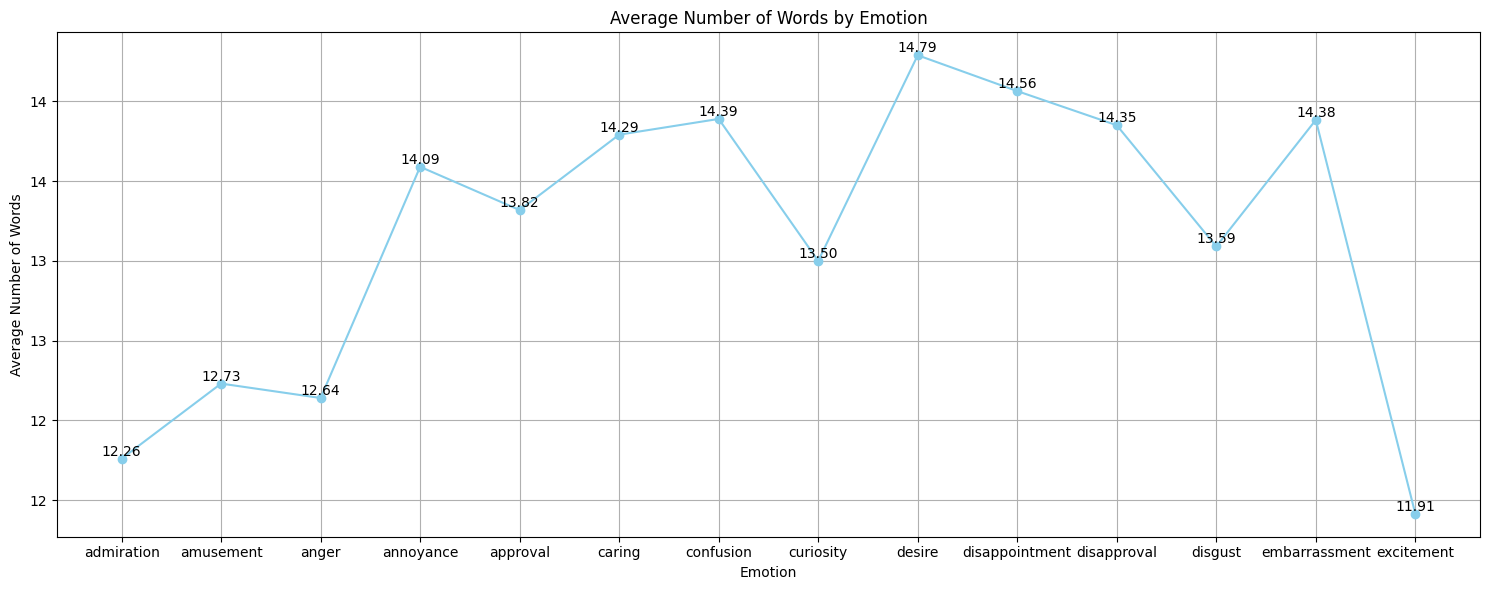

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

# Extract emotions and their average word counts
emotions = list(average_words_by_emotion.keys())[:14]
averages = list(average_words_by_emotion.values())[:14]

# Calculate standard deviation for each emotion
std_devs = [np.std(data[data[emotion] == 1]['text'].apply(lambda x: len(x.split()))) for emotion in emotions]

# Plot emotions and their average word counts with error bars
plt.figure(figsize=(15, 6))

# Plot the line chart with markers
plt.errorbar(emotions, averages,  fmt='-o', color='skyblue', capsize=5)

# Format y-axis labels with commas
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: format(int(x), ',')))

# Add text annotations for each point
for emotion, average in zip(emotions, averages):
    plt.text(emotion, average, f'{average:.2f}', ha='center', va='bottom')

plt.title('Average Number of Words by Emotion')
plt.xlabel('Emotion')
plt.ylabel('Average Number of Words')
plt.grid(True)  # Add grid for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


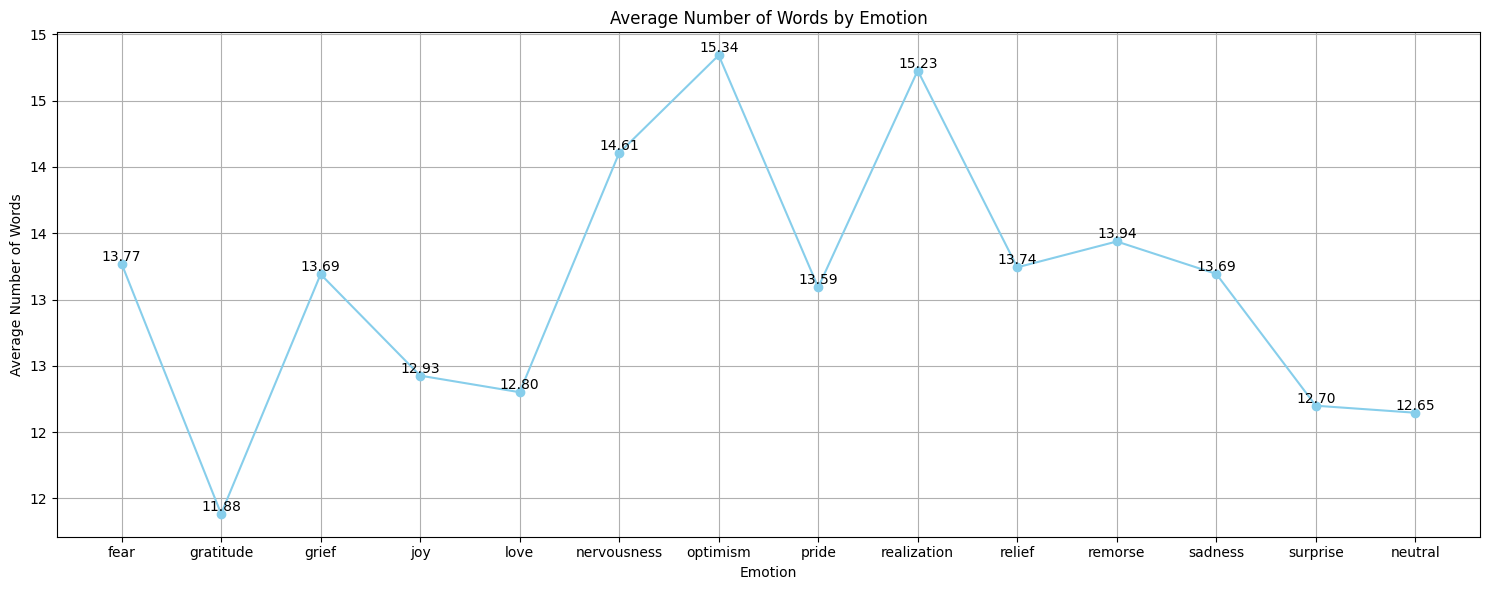

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

# Extract emotions and their average word counts
emotions = list(average_words_by_emotion.keys())[14:]
averages = list(average_words_by_emotion.values())[14:]

# Calculate standard deviation for each emotion
std_devs = [np.std(data[data[emotion] == 1]['text'].apply(lambda x: len(x.split()))) for emotion in emotions]

# Plot emotions and their average word counts with error bars
plt.figure(figsize=(15, 6))

# Plot the line chart with markers
plt.errorbar(emotions, averages,  fmt='-o', color='skyblue', capsize=5)

# Format y-axis labels with commas
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: format(int(x), ',')))

# Add text annotations for each point
for emotion, average in zip(emotions, averages):
    plt.text(emotion, average, f'{average:.2f}', ha='center', va='bottom')

plt.title('Average Number of Words by Emotion')
plt.xlabel('Emotion')
plt.ylabel('Average Number of Words')
plt.grid(True)  # Add grid for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [ ]:
import statistics
minFrequency=min(list(sortedDistinctWordsFrequency.values()))
maxFrequency=max(list(sortedDistinctWordsFrequency.values()))
avgFrequency = statistics.fmean(sortedDistinctWordsFrequency.values())


In [ ]:
import matplotlib.pyplot as plt

def plot_word_categories(distinctWordsFrequency, minFrequency, avgFrequency):
    # Define thresholds for each category
    low_threshold = minFrequency  # Words with frequency <= low_threshold are classified as simple
    high_threshold = avgFrequency  # Words with frequency >= high_threshold are classified as complex

    # Initialize counters for each category
    simple_count = 0
    medium_count = 0
    complex_count = 0
    
    # Classify words into categories based on their frequency
    for frequency in distinctWordsFrequency.values():
        if frequency <= low_threshold:
            simple_count += 1
        elif frequency >= high_threshold:
            complex_count += 1
        else:
            medium_count += 1

    # Plot the categories of words and the number of words in each category
    categories = ['Simple Category', 'Medium Category', 'Complex Category']
    counts = [simple_count, medium_count, complex_count]

    plt.pie(counts, labels=categories, colors=['#40E0D0', '#DAA520', '#DC143C'], autopct='%1.1f%%', startangle=140)
    plt.title('Categories of Words and Number of Words in Each Category')
    plt.show()



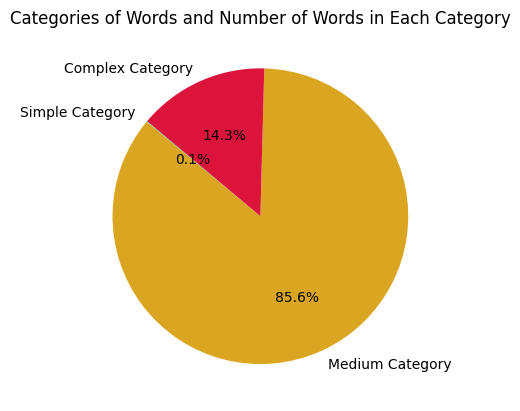

In [ ]:
plot_word_categories(distinctWordsFrequency,minFrequency,avgFrequency)

In [ ]:
import pandas as pd
from collections import defaultdict
from nltk.tokenize import word_tokenize  # You might need to install nltk and download its resources

# Assuming your DataFrame is named df and 'text' is the column containing text data
# Assuming emotions are columns from 'admiration' to 'neutral'

# List of emotions
emotions = data.columns[9:]  # Assuming the emotions start from column 9

# Dictionary to store distinct words for each emotion
distinct_words_per_emotion = defaultdict(set)

# Iterate over each row in the DataFrame
for index, row in data.iterrows():
    text = row['text']
    words = word_tokenize(text)  # Tokenize the text into words
    
    # Iterate over each emotion
    for emotion in emotions:
        if row[emotion]:  # Check if the emotion is present in the row
            distinct_words_per_emotion[emotion].update(words)  # Add words to the set for the respective emotion



In [ ]:
""" # Print the distinct words associated with each emotion
for emotion, words in distinct_words_per_emotion.items():
    print(f"Emotion: {emotion}")
    print("Distinct Words:")
    for word in words:
        print(word) """
print(distinct_words_per_emotion.items())

dict_items([('sadness', {'unfair', 'culturally', 'episode', 'passed', 'ended', 'remember', 'station', 'Astaghfirullah', 'lesser', 'Pathetic', 'unsatisfying', 'androgynous', 'certainly', 'separating', 'haunts', 'bottle', 'A', 'Don', 'Ofc', 'several', 'proletariat', 'stalking', 'meditate', 'Girlfriend', 'harmed', 'Syria', 'legal', 'drunkenness', 'tone', 'Needs', 'Agreed', 'Bummer', 'educated', 'acting', 'stolen', 'minutes', 'LIKE', 'FO', 'marital', 'sitting', 'famine', 'burning', 'bag', 'vanished', 'Restart', 'bathroom', 'Aquaria', 'Tired', 'BB-8', 'Insanity', 'mockery', "'re", 'nosoulcels', 'sharer', 'Bruised', 'incredible', 'much', 'yEaH', 'material', 'asshole', 'Probably', 'Promise', 'Walls', 'brows', 'concern', 'knows', 'leafs', 'Toewster', 'mayo', 'unusual', 'belief', 'waxing', 'trunk', 'degraded', 'oppressed', 'safe', 'f', 'lies', 'testimony', 'collars', 'clients', 'ails', 'demoralizing', 'straw', 'resistant', 'leaves', 'serial', 'Damage', 'cringeworthy', 'significantly', 'ravaged'

In [ ]:
word_freq_per_emotion.items()

dict_items([])